In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


--- Melatih Model SVM ---
--- Melatih Model Random Forest ---

==================== [HASIL EVALUASI SVM] ====================
              precision    recall  f1-score   support

       Anger       0.43      0.43      0.43        53
Anticipation       0.60      0.75      0.66       244
     Disgust       0.35      0.19      0.24        32
        Fear       0.49      0.41      0.45        92
         Joy       0.62      0.58      0.60        69
     Sadness       0.49      0.43      0.46        61
    Surprise       0.51      0.41      0.45        61
       Trust       0.50      0.48      0.49       128

    accuracy                           0.54       740
   macro avg       0.50      0.46      0.47       740
weighted avg       0.53      0.54      0.53       740


==================== [HASIL EVALUASI RANDOM FOREST] ====================
              precision    recall  f1-score   support

       Anger       0.40      0.36      0.38        53
Anticipation       0.54      0.85      

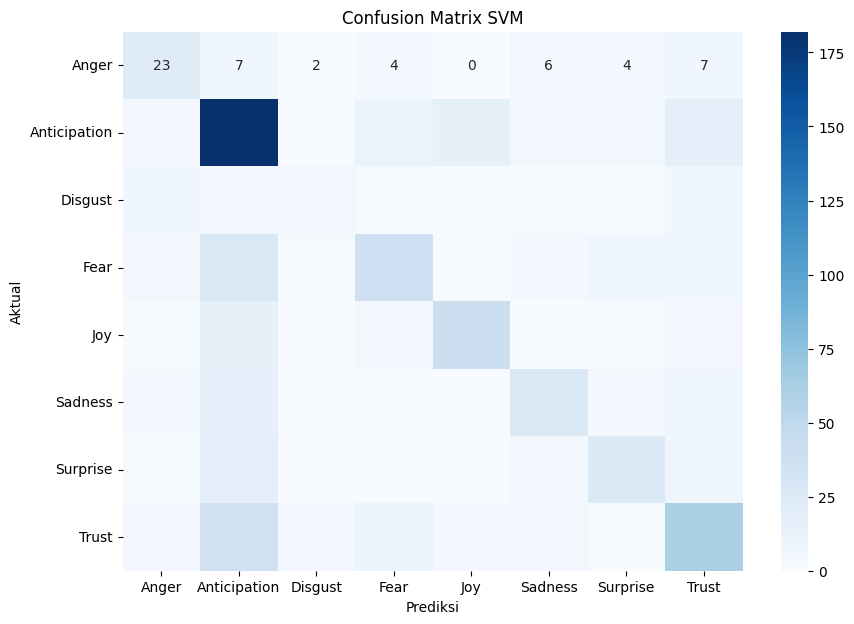

In [2]:
# 1. Load Data (Pastikan folder dan nama file sesuai)
train_ready = pd.read_csv('dataset_final/train_final.csv')
val_ready = pd.read_csv('dataset_final/val_final.csv')
test_ready = pd.read_csv('dataset_final/test_final.csv')

# 2. Vektorisasi Teks
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(train_ready['caption_cleaned'])
X_val = tfidf.transform(val_ready['caption_cleaned']) # Opsional untuk tuning
X_test = tfidf.transform(test_ready['caption_cleaned'])

y_train = train_ready['emotion']
y_test = test_ready['emotion']

# 3. Model 1: SVM
print("\n--- Melatih Model SVM ---")
svm_model = SVC(kernel='linear', class_weight='balanced', probability=True)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# 4. Model 2: Random Forest
print("--- Melatih Model Random Forest ---")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# 5. Evaluasi Hasil
print("\n" + "="*20 + " [HASIL EVALUASI SVM] " + "="*20)
print(classification_report(y_test, y_pred_svm))

print("\n" + "="*20 + " [HASIL EVALUASI RANDOM FOREST] " + "="*20)
print(classification_report(y_test, y_pred_rf))

# 6. Visualisasi Confusion Matrix (Sangat Penting untuk Analisis Sadness)
def plot_cm(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10,7))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=svm_model.classes_, yticklabels=svm_model.classes_, cmap='Blues')
    plt.xlabel('Prediksi')
    plt.ylabel('Aktual')
    plt.title(title)
    plt.show()

plot_cm(y_test, y_pred_svm, 'Confusion Matrix SVM')